In [28]:
#Factors affecting on MOE
#Effect of SD on MOE
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import norm, zscore

In [29]:
z=1.96
n=64
sd=10

In [30]:
moe=[]
std_dev=range(21)

In [31]:
for i in std_dev:
    moe.append(z*i/sqrt(n))
moe

[0.0,
 0.245,
 0.49,
 0.735,
 0.98,
 1.225,
 1.47,
 1.7149999999999999,
 1.96,
 2.205,
 2.45,
 2.695,
 2.94,
 3.185,
 3.4299999999999997,
 3.675,
 3.92,
 4.165,
 4.41,
 4.655,
 4.9]

Text(0, 0.5, 'moe')

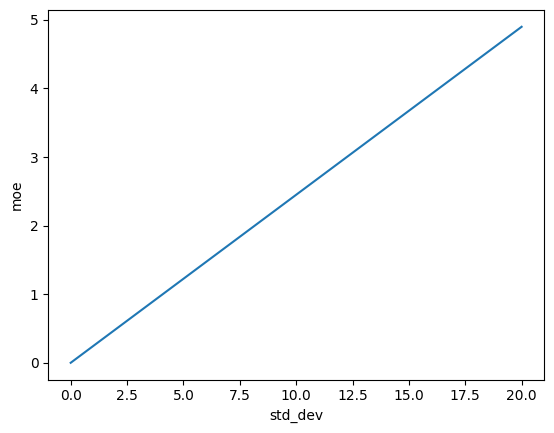

In [32]:
plt.plot(std_dev,moe)
plt.xlabel('std_dev')
plt.ylabel('moe')

In [33]:
#Effect of sample size on MOE
moe=[]
sample_size=range(10,1000,10)

In [34]:
for i in sample_size:
    moe.append(z*sd/sqrt(i))

Text(0, 0.5, 'moe')

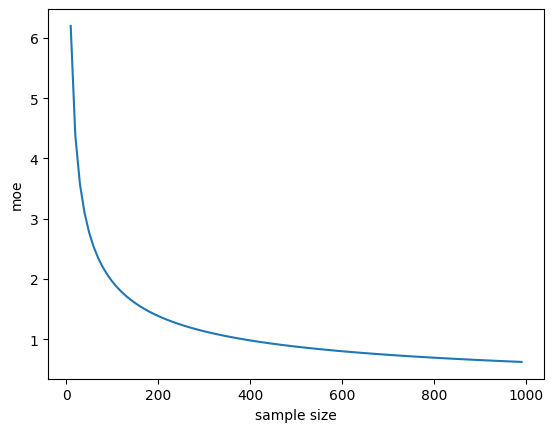

In [35]:
plt.plot(sample_size, moe)
plt.xlabel('sample size')
plt.ylabel('moe')

In [36]:
#Effect of CI on MOE
ci=[i for i in np.arange(75,100,0.1)]
z=[-norm.ppf((1-i/100)/2) for i in ci]

In [37]:
moe=[]
for i in z:
    moe.append(i*sd/sqrt(n))

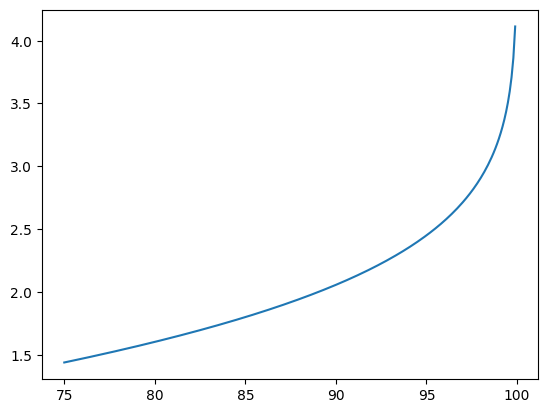

In [38]:
plt.plot(ci, moe)

In [39]:
#student's t distribution
from scipy.stats import t

In [40]:
x=np.arange(-3.8, 4, 1/20)

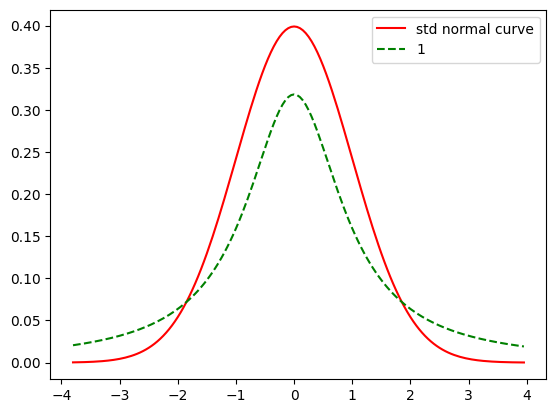

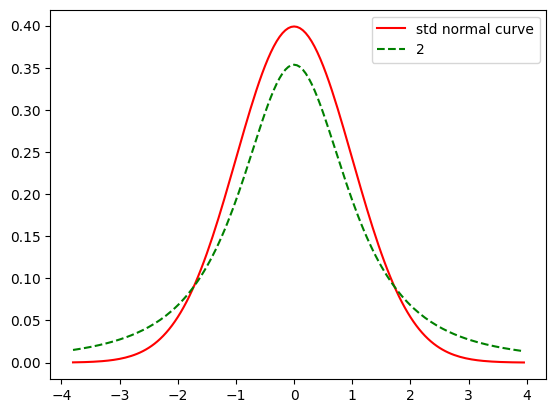

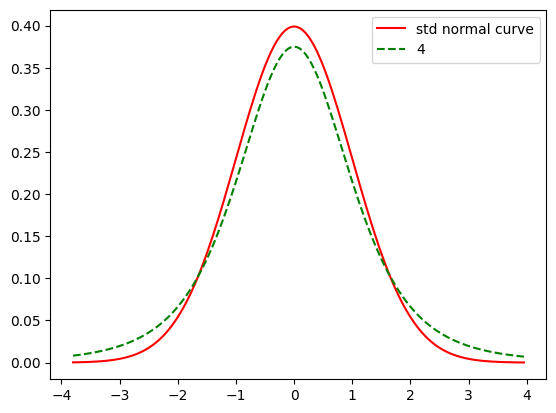

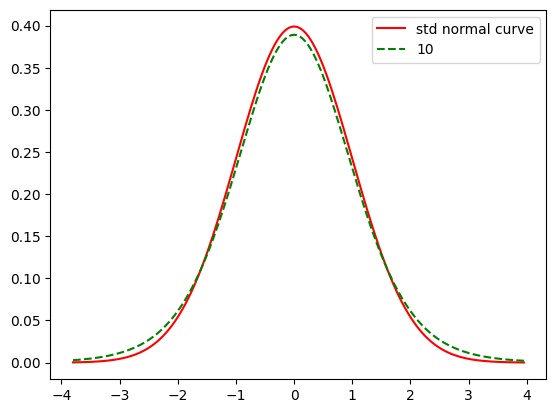

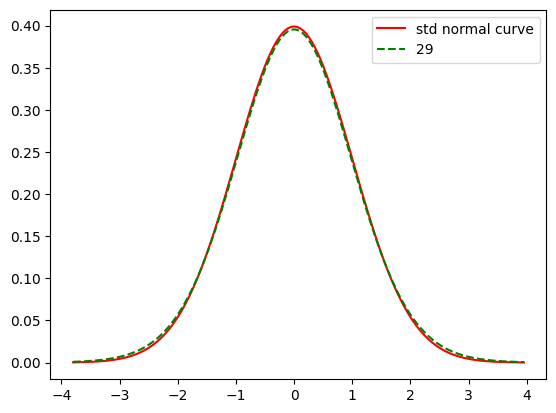

In [41]:
for i in [1,2,4,10,29]:
    plt.plot(x, norm.pdf(x), color='red', label='std normal curve')
    plt.plot(x, t.pdf(x,i),'--', color='green', label=i)
    plt.legend(loc='upper right')
    plt.show()

In [42]:
# Hypothesis Tesing(two tailed test)
def two_tailed(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z=abs(norm.ppf(alpha/2))
    hypo_z=((sample_mean-pop_mean)/(std_dev/sqrt(sample_size)))
    print("actual z=", actual_z)
    print("hypo z", hypo_z)
    if actual_z>=hypo_z or hypo_z<= -(actual_z):
        return True
    else:
        return False


alpha=0.05
sample_mean=585
pop_mean=558
sd=139
sample_size=100

print('H0: mu=', pop_mean)
print('h1: mu!=', pop_mean)
print('alpha=',alpha)
reject = two_tailed(sample_mean, pop_mean, sd, sample_size, alpha)
if reject:
    print("Reject H0")
else:
    print("Failed to reject H0")

H0: mu= 558
h1: mu!= 558
alpha= 0.05
actual z= 1.9599639845400545
hypo z 1.9424460431654675
Reject H0


In [43]:
# Hypothesis Tesing(left tailed test)
def two_tailed(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z=abs(norm.ppf(alpha))
    hypo_z=((sample_mean-pop_mean)/(std_dev/sqrt(sample_size)))
    print("actual z=", actual_z)
    print("hypo z", hypo_z)
    if hypo_z<= -(actual_z) :
        return True
    else:
        return False


alpha=0.05
sample_mean=585
pop_mean=558
sd=139
sample_size=100

print('H0: mu>=', pop_mean)
print('h1: mu<', pop_mean)
print('alpha=',alpha)
reject = two_tailed(sample_mean, pop_mean, sd, sample_size, alpha)
if reject:
    print("Reject H0")
else:
    print("Failed to reject H0")

H0: mu>= 558
h1: mu< 558
alpha= 0.05
actual z= 1.6448536269514729
hypo z 1.9424460431654675
Failed to reject H0


Proportion of CIs covering Pop mean 0.95


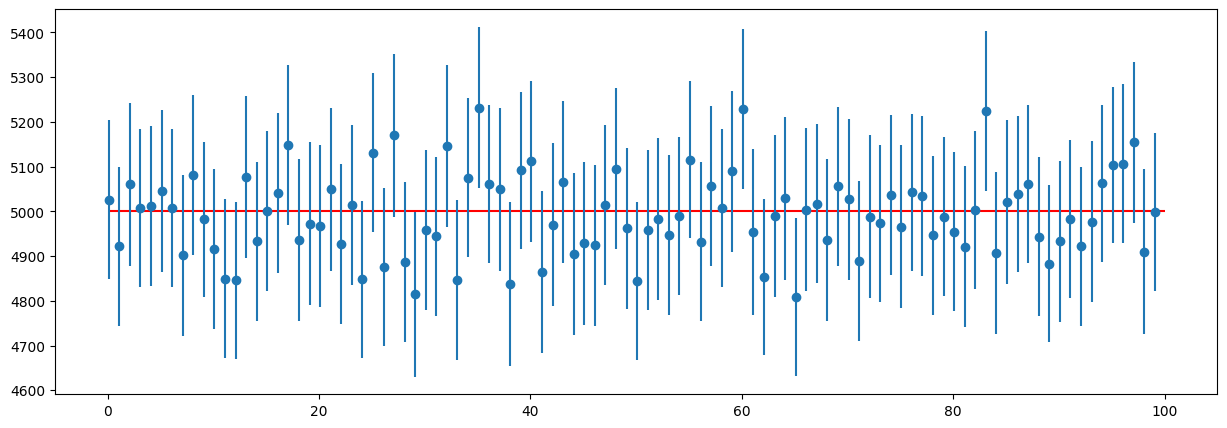

In [44]:
#Confidence Interval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random

population = np.arange(1, 10**4)      #random population
pop_mean = np.mean(population)

def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = random.sample(list(population), sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample),
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1

    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(15,5))
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()


sampling(1000, 100)

In [45]:
#CI for population where 95% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

#parameters....population, required_CI, sample_size, no_of_samples
def CI(pop, ci, samp_size, no_of_samples):
    print("\nfor ci of", ci, "sample_size", samp_size)
    pop_mean = np.mean(pop)
    print('actual mean :',pop_mean)

    #calculation of same using CI
    samp_means = []      #mean of all the samples
    for i in range(no_of_samples):
        samp_means.append(np.mean(sample(pop, samp_size)))

    #calculation of interval
    print('mean of samples :', np.mean(samp_means))
    pop_stdev = np.std(samp_means) / math.sqrt(samp_size)
    z = 1.96
    print("confidence interval :", pop_mean, "+-", z*pop_stdev)
    plt.hist(samp_means)
    plt.show()

pop = sample(range(1, 2*10**5), 10**4)  #random population generation



for ci of 0.95 sample_size 1000
actual mean : 99868.8769
mean of samples : 99829.75502499999
confidence interval : 99868.8769 +- 100.31890514763127


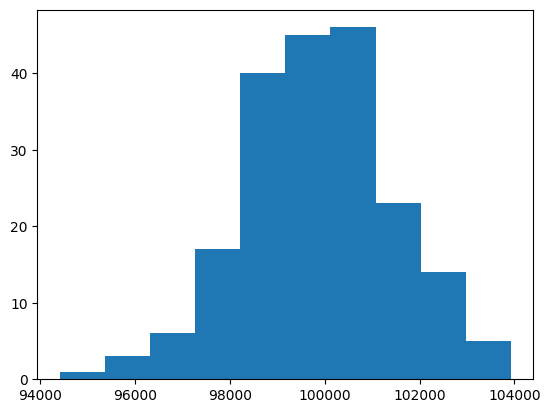


for ci of 0.95 sample_size 1000
actual mean : 99868.8769
mean of samples : 99954.31825
confidence interval : 99868.8769 +- 99.85019532522328


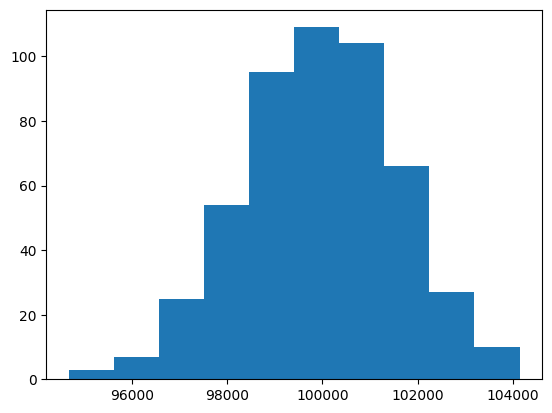


for ci of 0.95 sample_size 1000
actual mean : 99868.8769
mean of samples : 99809.67433800001
confidence interval : 99868.8769 +- 106.98234696271034


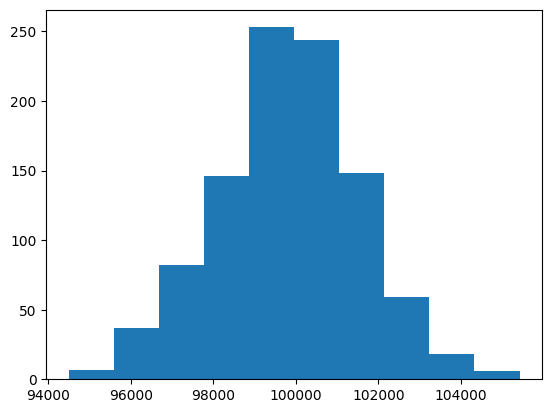

In [46]:
#varying no_of_samples
CI(pop, 0.95, 1000, 200)
CI(pop, 0.95, 1000, 500)
CI(pop, 0.95, 1000, 1000)
#shape of the curve becomes normal as the no of samples increases(samp_mean better approx of actual mean)


for ci of 0.95 sample_size 100
actual mean : 99868.8769
mean of samples : 100167.89752000001
confidence interval : 99868.8769 +- 1104.420573209601


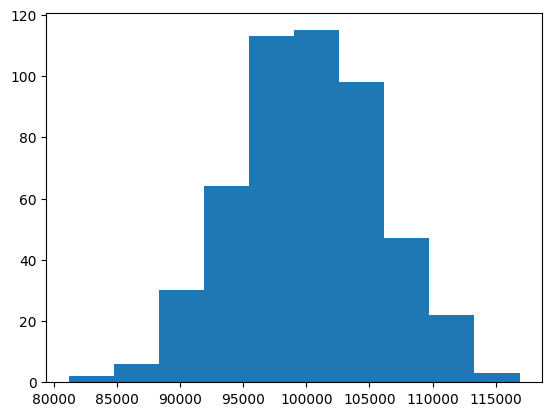


for ci of 0.95 sample_size 500
actual mean : 99868.8769
mean of samples : 99902.425188
confidence interval : 99868.8769 +- 221.093272090556


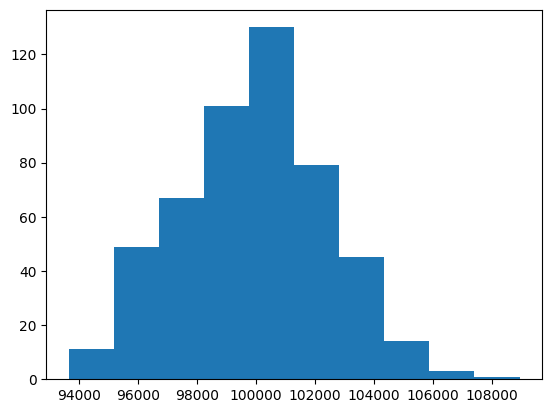


for ci of 0.95 sample_size 1000
actual mean : 99868.8769
mean of samples : 99816.175872
confidence interval : 99868.8769 +- 101.65992167967916


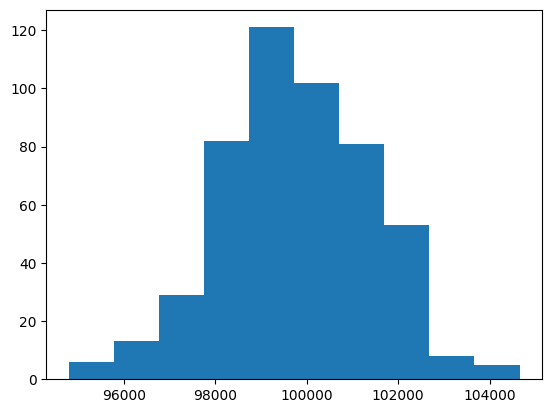

In [47]:
CI(pop, 0.95, 100, 500)
CI(pop, 0.95, 500, 500)
CI(pop, 0.95, 1000, 500)

In [48]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot


In [49]:

# seed the random number generator
seed(1)

def plot_clt(n):
    # calculate the mean of 50 dice rolls n times
    means = [mean(randint(1, 7, 50)) for _ in range(n)]

    # plot the distribution of sample means
    pyplot.hist(means)
    pyplot.show()

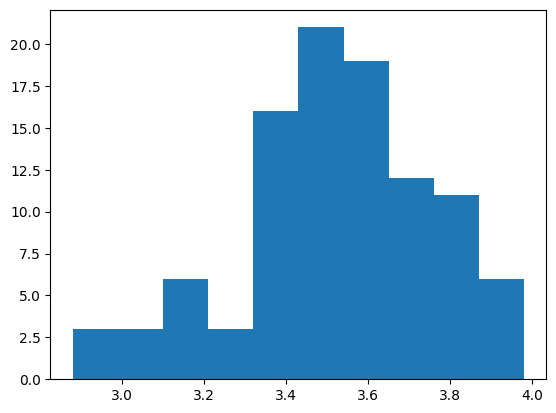

In [50]:
plot_clt(100)

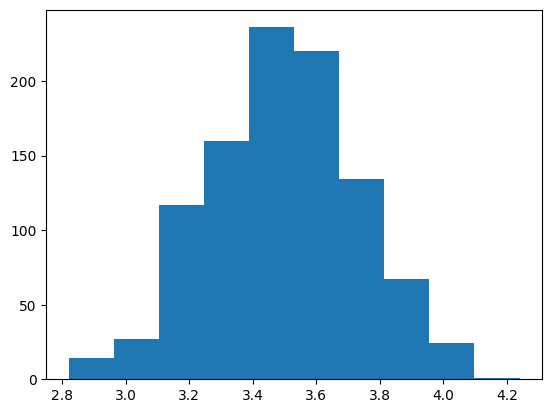

In [51]:
plot_clt(1000)

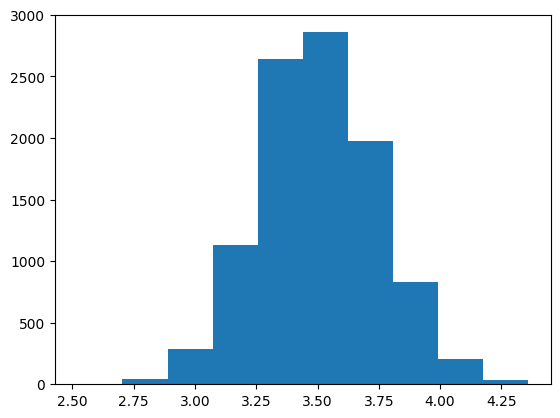

In [52]:
plot_clt(10000)

In [53]:

#Z-score for given area

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

area = 0.95     #area under the graph
#convert values to z-score
print('z-score:',norm.ppf(area))

z-score: 1.6448536269514722


In [54]:
#Given X ~ N(mu, var)
#Finding Probabilities

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu = 40
x = 47
sigma = 8
z = (x - mu)/sigma
print('Finding P(z <',z,')')
print('Area to left of x : ',norm.cdf(z))

print('Finding P(z >', z,')')
print('Area to right of x : ',1 - norm.cdf(z))
#since total area under the graph is 1


Finding P(z < 0.875 )
Area to left of x :  0.8092130471474893
Finding P(z > 0.875 )
Area to right of x :  0.19078695285251068


In [55]:
#Area in an interval between two values a and b
from scipy.stats import norm
def prob(a,b):
    z1 = (a - mu)/sigma
    z2 = (b - mu)/sigma
    print('Finding P(',z1,'< z <', z2,')')
    print('Area to left of a : ',norm.cdf(z1))
    print('Area to left of b : ',norm.cdf(z2))
    print('Area to between a and b: ',norm.cdf(z2) - norm.cdf(z1))

mu = 50
sigma = 5
prob(44.5, 55.5)

Finding P( -1.1 < z < 1.1 )
Area to left of a :  0.13566606094638267
Area to left of b :  0.8643339390536173
Area to between a and b:  0.7286678781072347


In [56]:
from scipy.stats import norm
def fun(z1, z2):
    return norm.cdf(z1) - norm.cdf(z2)

a = 65
b = 32
mu=25
sigma=5
z1 = (a-mu)/sigma
z2 = (b-mu)/sigma
area = fun(z1, z2)
print("required area is :",area)

required area is : 0.0807566592337704


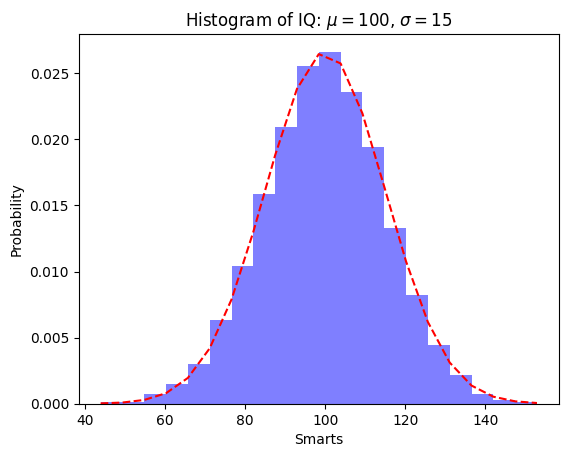

In [58]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

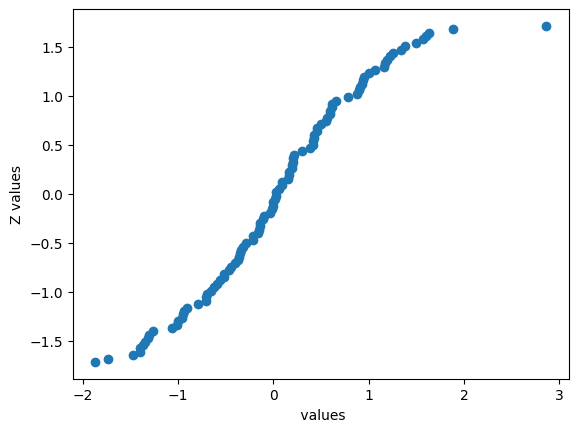

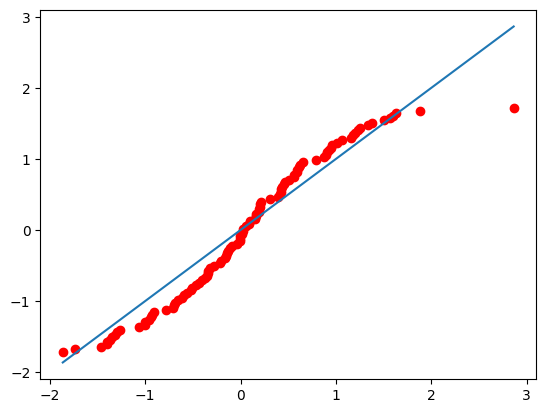

In [62]:
#normal_prob plot
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#its just an example npp of original values v/s theortical values(z scores)
def npp(data):
    data = sorted(data)
    p = [(data.index(i)-0.5)/len(data) for i in data]
    z = zscore(p)

    plt.scatter(data, z)
    plt.ylabel('Z values')
    plt.xlabel(' values')
    plt.show()
    plt.plot(data,  z,'ro',data,  data)
    plt.show()

#n datapoints
n = 100
data = np.random.randn(n)
npp(data)

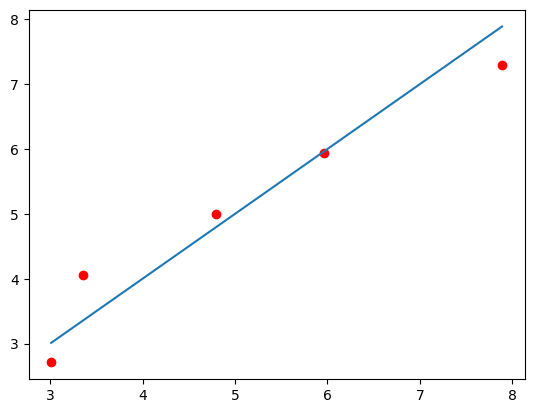

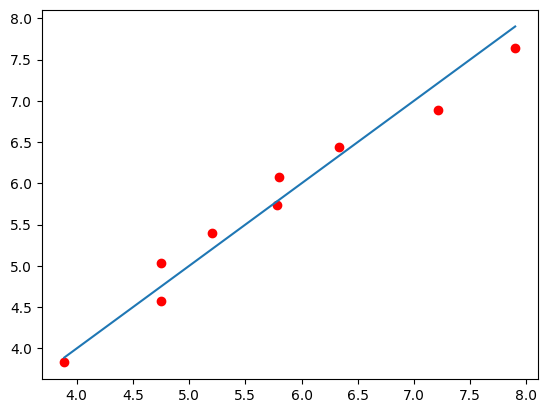

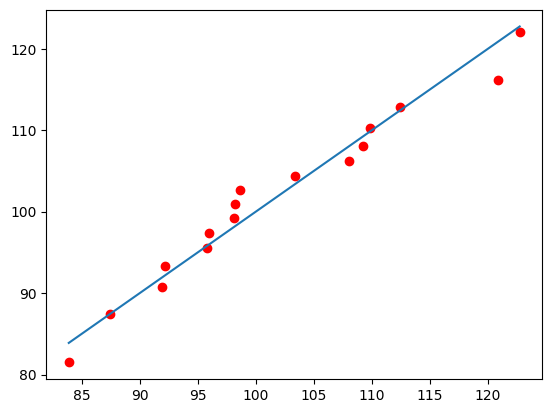

In [63]:

X1 = [3.01, 3.35, 4.79, 5.96, 7.89]

X2 = [3.89, 4.75, 4.75, 5.20, 5.78, 5.80, 6.33, 7.21, 7.90]

X3 = [108.047, 109.249, 103.385, 112.454, 95.780,  122.734, 109.842 , 120.858,
      98.604, 98.122,  95.971, 98.173,   87.437 , 91.884, 92.193,  83.882]
def npp1(data):
    p =[]
    t =[]
    data = np.sort(np.array(data))
    p = [(i - 0.5)/len(data) for i in range(1, len(data)+1)]
    t = [norm.ppf(i, np.mean(data), np.std(data)) for i in p] #Computes the theoretical quantiles based on the normal distribution with mean and standard deviation calculated from the data. norm.ppf is the Percent-Point Function
    plt.plot(data, t, 'ro', data, data)
    plt.show()

npp1(X1)
npp1(X2)
npp1(X3)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


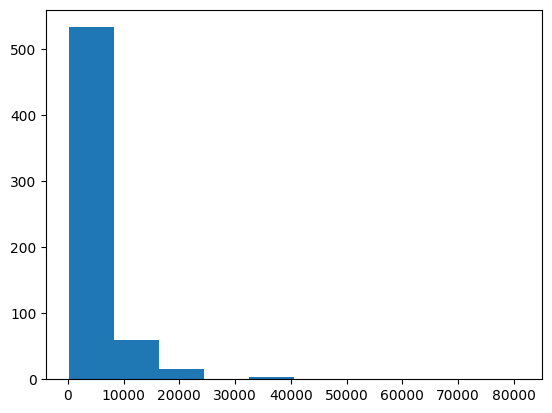

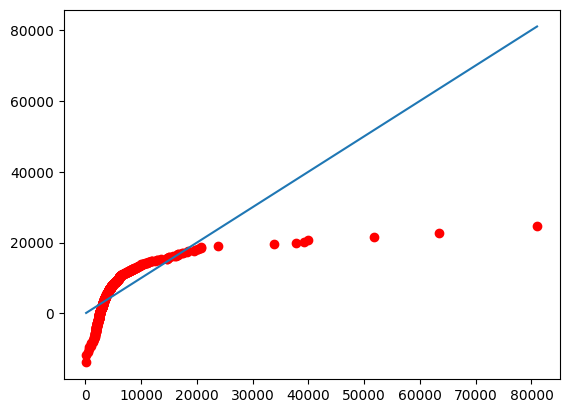

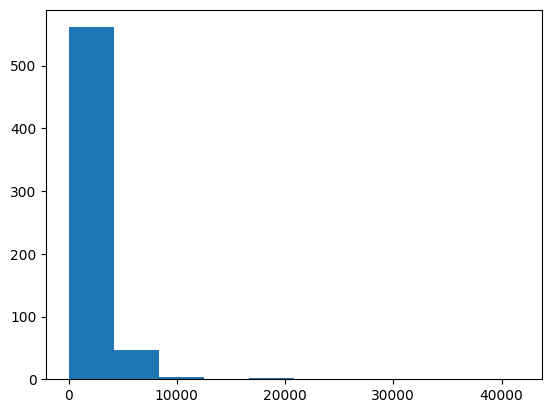

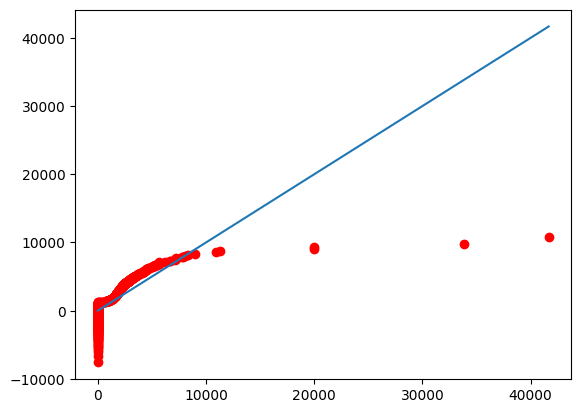

In [70]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
plt.hist(df.ApplicantIncome)
plt.show()
npp1(df.ApplicantIncome)
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
plt.hist(df1.CoapplicantIncome)
plt.show()
npp1(df1.CoapplicantIncome)

In [60]:
#correlation
import pandas as pd
import numpy as np
data={
    'Age':[25,30,35,40,45,50,55,60,65,70],
    'BloodPressure':[120,125,130,135,120,145,100,155,160,165],
}
df=pd.DataFrame(data)
mean_x=np.mean(df['Age'])
mean_y=np.mean(df['BloodPressure'])

numerator=np.sum((df['Age']-mean_x)*(df['BloodPressure']-mean_y))
denominator_x=np.sum((df['Age']-mean_x)**2)
denominator_y=np.sum((df['BloodPressure']-mean_y)**2)
pearson_corr=numerator/np.sqrt(denominator_x*denominator_y)
print(f"Pearson Correlation Coefficient(Manual Calculation): {pearson_corr}")
if pearson_corr>0:
    if(pearson_corr>0.5):
        print("Strong Positive Correlation")
    elif(0.5<pearson_corr<0.8):
        print("Moderate Positive Correlation")
    else:
        print("Weak Positive Correlation")

elif pearson_corr<0:
    if pearson_corr < -0.8:
        print("Strong Negative Correlation")
    elif -0.8 <= pearson_corr < -0.5:
        print("Moderate Negative Correlation")
    else:
        print("Weak Negative Correlation")

else:
    print("No Correlation")






Pearson Correlation Coefficient(Manual Calculation): 0.6188053895958223
Strong Positive Correlation


Intercept: 50.0000
Slope: 0.1000
R-squared: 1.0000


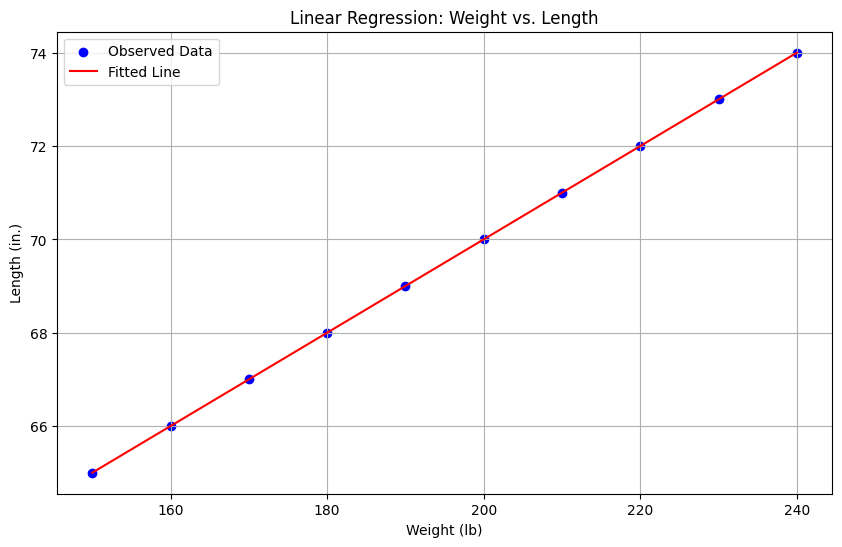

In [59]:
#Linear regression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

weight = np.array([150, 160, 170, 180, 190, 200, 210, 220, 230, 240])  # Weight in pounds
length = np.array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74])  # Length in inches

slope, intercept, r_value, p_value, std_err = stats.linregress(weight, length)

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")

length_predicted = intercept + slope * weight

plt.figure(figsize=(10, 6))
plt.scatter(weight, length, color='blue', label='Observed Data')
plt.plot(weight, length_predicted, color='red', label='Fitted Line')
plt.title('Linear Regression: Weight vs. Length')
plt.xlabel('Weight (lb)')
plt.ylabel('Length (in.)')
plt.legend()
plt.grid()
plt.show()

In [61]:
#chi-square test
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2

# observed frequencies
observed = np.array([10, 15, 20, 25, 30])

# expected frequencies (hypothetical)
expected = np.array([12, 18, 22, 24, 26])

chi2_stat = np.sum((observed - expected)**2 / expected)
df = len(observed)
critical_value = chi2.ppf(0.90, df)
p_value = 1 - chi2.cdf(chi2_stat, df)
if chi2_stat < critical_value:
    print("Accept null hypothesis")
else :
    print("Reject null hypothesis")


Accept null hypothesis
